# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('dados_m7.csv')

dados.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [2]:
dados.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [3]:
dados.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [4]:
info_mau = dados['mau'].value_counts()
info_mau = pd.DataFrame(info_mau)

info_mau


,count
mau,
False,16260
True,390


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [5]:
df_tipos = pd.DataFrame({
    'Variável': dados.columns,
    'Tipo de Dado': dados.dtypes.values
})

df_tipos

,Variável,Tipo de Dado
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [6]:
qtd_categorias = []

for coluna in dados.columns:
    qtd_categorias.append(dados[coluna].nunique())

df_tipos['qtd_categorias'] = qtd_categorias

df_tipos


,Variável,Tipo de Dado,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [7]:
colunas_categoricas = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
    'educacao', 'estado_civil', 'tipo_residencia'
]

dados_dummies = pd.get_dummies(dados[colunas_categoricas], drop_first=True)

colunas_numericas = [
    'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular', 
    'possui_fone_comercial', 'possui_fone', 'possui_email', 'qt_pessoas_residencia'
]

dados_final = pd.concat([dados[colunas_numericas], dados_dummies, dados['mau']], axis=1)

dados_final.head()


,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,True,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,True,False,True,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,True,True,...,True,False,False,False,True,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,True,False,False,False,False,False


In [8]:
dados_final.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool
estado_civil_Married                         bool


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

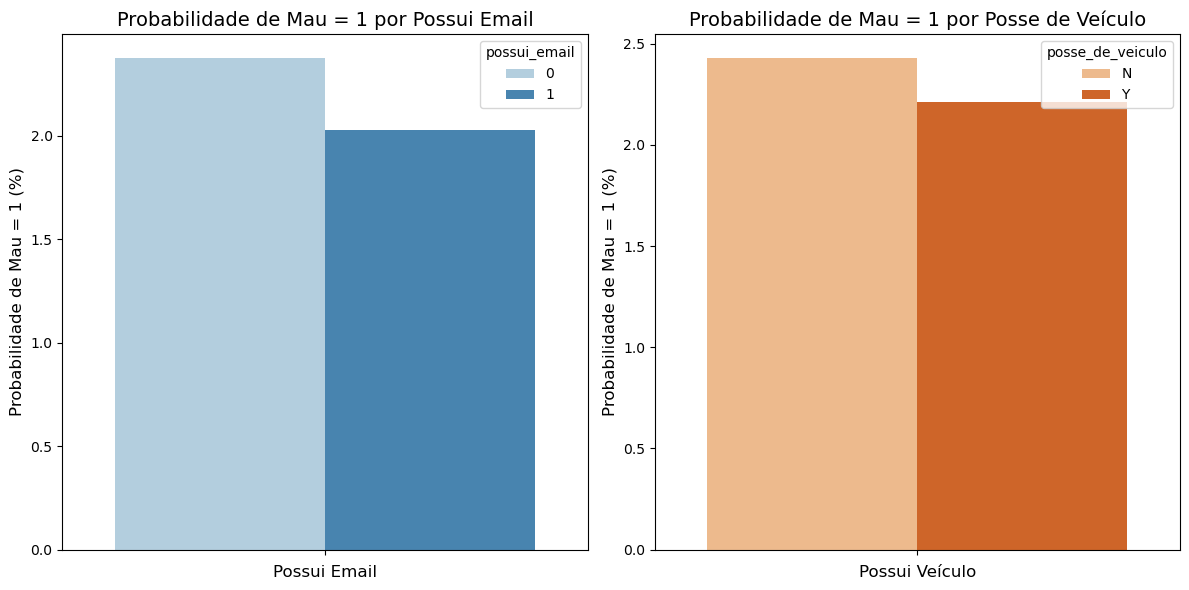

In [9]:
tabela_email = pd.crosstab(dados['possui_email'], dados['mau'], normalize='index') * 100

tabela_veiculo = pd.crosstab(dados['posse_de_veiculo'], dados['mau'], normalize='index') * 100

probabilidade_email = tabela_email[True]  
probabilidade_veiculo = tabela_veiculo[True]  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(hue=probabilidade_email.index, y=probabilidade_email, ax=axes[0], palette='Blues')
axes[0].set_title('Probabilidade de Mau = 1 por Possui Email', fontsize=14)
axes[0].set_xlabel('Possui Email', fontsize=12)
axes[0].set_ylabel('Probabilidade de Mau = 1 (%)', fontsize=12)

sns.barplot(hue=probabilidade_veiculo.index, y=probabilidade_veiculo, ax=axes[1], palette='Oranges')
axes[1].set_title('Probabilidade de Mau = 1 por Posse de Veículo', fontsize=14)
axes[1].set_xlabel('Possui Veículo', fontsize=12)
axes[1].set_ylabel('Probabilidade de Mau = 1 (%)', fontsize=12)

plt.tight_layout()
plt.show()

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [11]:

caminho_arquivo = 'C:\\Users\\marci\\Desktop\\Márcio\\Programação\\EBAC\\02 - Phyton\\3 - Python em Ciência de Dados\\Módulo 1\\Mod 7\\dados_tratados.xlsx'

dados_final.to_excel(caminho_arquivo, index=False)